Danneau Florian

Garnier maxime

Travail personnel numéro 1


1) l'équation différentielle de ce problème se présente comme :

r'' = G . (Mterre+MLune) . r / r^(3) 
Elle est trouvé en résolvant le problème avec l'aide du cours de mécanique analytique de Mr.Gaspard vu l'an passé et la page wikipédia relative au problème à 2 corps
https://fr.wikipedia.org/wiki/Probl%C3%A8me_%C3%A0_deux_corps

In [7]:
from math import sin, cos, log, pi  #On importe le matériel nécessaire à la résulution du problème
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

On débute l'algorithme pour utiliser la méthode de Runge-Kutta 4.

On fait alors une fonction pas "step", qui va faire une étape a la fois de Runge Kutta 4.

C'est à dire, calculer les k1,k2,k3,k4 et renvoyer la valeur u entrée + 1/6 . dt . (k1+2k2 + 2k3 + k4)

In [2]:
def RK4_step (u,f,dt):           #u valeur entrée, f une fonction définie en dehors qui va agir sur u et dt le pas.
    k1 = f(u)
    k2 = f(u + 1/2*dt*k1)
    k3 = f(u + 1/2*dt*k2)
    k4 = f(u + dt*k3)
    K = k1+2*k2+2*k3+k4
    return u + 1/6*dt*K



On donne les valeurs des constantes nécessaires:

In [3]:
G = 6.67408*10**(-11)           #constante gravitationnelle          
Mterre = 5.972*10**24           #masse de la terre
Mlune = 7.348*10**22            #masse de la lune

on définit la fonction qui va agir sur la valeur entrée.

Ici on parle bien de la fonction trouvée en utilisant la même méthode que pour le phugoïd. C'est à dire, transformer l'équation différentielle du second degré, en 2 équations différentielles du premier degré.

Cela va donc donner la fonction qui agit comme  f :(x,y,vx,vy)=>( vx , vy , -G.(Mterre+Mlune).x/(x^2+y^2)^(3/2) , -G.(Mterre+Mlune).y/(x^2+y^2)^(3/2) )

In [4]:
def f(u):                         #u sera une liste de 4 éléments : les position, x et y et les vitesses vx,vy
    x = u[0]
    y = u[1]
    vx = u[2]
    vy = u[3]
    return numpy.array([vx,vy,-G*(Mterre+Mlune)*x/(x**2+y**2)**(3/2),-G*(Mterre+Mlune)*y/(x**2+y**2)**(3/2)])

Ensuite, puisque nous ne connaissions pas la valeur de la période de l'éllipse, nous devions prendre une valeur au hasard, jusqu'à laquelle notre code allait calculer.

Par essai erreur du code ci-dessous, que nous allons expliquer, nous avons fait un graphe des points de positions donnés, et regarder à peu près, partir de quand l'ellipse était complète. Nous sommes arrivés à une valeur de T=2450000.0 secondes.

nous allons donc arreter de calculer (pour le moment) quand nous atteignons ce nombre de pas.

Expliquons le code ci-dessous. Nous devons répéter la méthode de Runge-Kutta 4 le nombre de fois nécessaires, à trouver la positions de la lune, jusqu'à ce qu'elle fasse une orbite complète. Pour le moment il n'est pas important de dépasser un peu la position de départ.

L'étape d'utilisation de Runge Kutta 4 a déjà été codé avant. Maintenant il faut répéter cette étape pour calculer chaque positions et vitesse de la lune au cours de l'orbite.

In [5]:
T = 2450000.0                #nombre de pas à effectuer (car dt =1)
dt = 1                       #pas, en secondes
N = int(T/dt)+1              #taille de la liste nécessaire pour avoir toutes les valeurs calculées
x0 = -362600000.0            #position de départ de la lune (terre en (0,0)), en x
y0 = 0.0                     #position de départ de la lune en y
vx0 = 0.0                    #vitesse de départ de la lune en x  (terre = (0,0))
vy0 = 1083.434974                 #vitesse de départ de la lune en y
u_rk4   = numpy.empty((N, 4))                      #on crée la liste de N lignes et 4 colonnes (x,y,vx,vy)
u_rk4[0]   = numpy.array([x0, y0, vx0, vy0])       #on donne l'élément de départ
for n in range(N-1):                               
    u_rk4[n+1]   = RK4_step(u_rk4[n], f, dt)  #chaque élément est calculé par RK4sur les données du point précedent

Voici l'élipse donnée par le calcul.
    

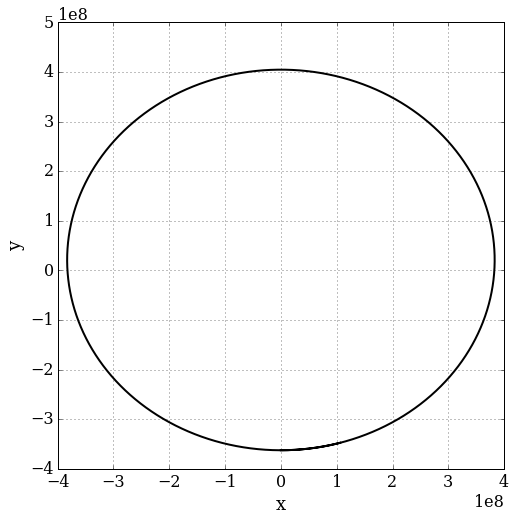

In [6]:
x = u_rk4[:,0]
y = u_rk4[:,1]
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.plot(y,x, 'k-', lw=2);

2) Claculons maintenant l'apogée, la valeur maximum de la position en y et le minmum de la position en y 

In [22]:
xmax = max(u_rk4[:,0])           #donne le maximum dans la colonne des x
ymax = max(u_rk4[:,1])           #donne le max dans la colonne des y
ymin = min(u_rk4[:,1])           #donne le minimum dans la colonne des y
print (xmax)
print (ymin)
print (ymax)

404726232.866
-383084497.255
383084497.255


calculons a et b

In [25]:
#le demi petit axe b est donné par
b = (ymax - ymin)/2           #le "diamètre" de l'elipse en y divisé par 2
print (b)

383084497.255


In [26]:
#le demi grand axe a est donné par
a = (xmax - x0)/2           #le "diamètre" de l'élipse en x divisé par 2
print (a)

383663116.433


Nous avons donc comme valeurs : a=383663116.433  et b =383084497.255 en mètres

On peut calculer aussi l'excentricité, pour comparer avec la valeur théorique.

In [27]:
#le calcul de l'excentricité est donné par
e = (1-(b/a)**(2))**(1/2)
print (e)

0.0549000295618


3) Calculons la période 

Nous avons utiliser le fait que la période est déterminée dans le dernier quadrant de l'elipse au moment où on passde y négatifs à y positifs. Dans le dernier quadrant les x et y sont négatifs. Et au moment ou y ne l'est plus, on  a atteint le point de départ.

In [28]:

for i in range(N):                            #on parcours donc la liste de points créée par RK4
    if u_rk4[i][0] < 0 and u_rk4 [i][1] < 0 :
        T = i                               #et on prend le dernier élément du dernier quadrant
         
print (T)

2350681


On a donc une orbite de 2350681 secondes. C'est à dire : ~27,2 jours

4)Parlons de l'ordre de convergence de notre méthode numérique

Ensuite on va utiliser la même méthode que pour le phugoïd pour comparer les résultats les plus précis et les moins précis pour nos valeurs données par RK4.

On définit une fonction qui va comparer pour chaque pas les résulats dans nos listes. Indépendamment de la taille de celles-ci.

In [72]:
def get_diffgrid(u_current, u_fine, dt):      #u_current est nos valeurs moins précises et u_fine sont les valeurs plus précises 
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
   
    grid_size_ratio = int(numpy.ceil(N_fine/N_current))
    
    diffgrid = dt * numpy.sum( numpy.abs(\
            u_current[:,2]- u_fine[::grid_size_ratio,2])) 
    
    return diffgrid               #diffgrid est une liste

In [73]:

dt_values = numpy.array([16000, 8000, 4000, 2000, 1000])      #on compare avec des pas de différentes tailles, au lieu de 1
                                                              #avec 1, le calcul serait trop long
u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    N = int(T/dt)+1   
    
    t = numpy.linspace(0.0, T, N)
    
    u_rk4 = numpy.empty((N, 4))
    u_rk4[0] = numpy.array([x0, y0, vx0, vy0])

    for n in range(N-1):
        u_rk4[n+1] = RK4_step(u_rk4[n], f, dt)
    
    u_values[i] = u_rk4
    
diffgrid = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):

    diffgrid[i] = get_diffgrid(u_values[i], u_values[-1], dt) 

On a comparé nos résultats de RK4 entre eux et on obtient des différences de la forme:

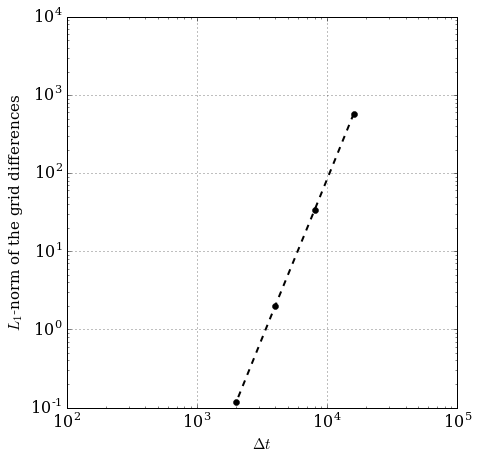

In [74]:
pyplot.figure(figsize=(7,7))
pyplot.grid(True)
pyplot.xlabel(r'$\Delta t$', fontsize=15)
pyplot.ylabel(r'$L_1$-norm of the grid differences', fontsize=15)
pyplot.xlim(1e2,1e5)
pyplot.ylim(1e-1,1e4)
pyplot.loglog(dt_values, diffgrid, color='k', ls='--', lw=2, marker='o');

Si on regarde alors l'ordre de convergence pour les pas pris au dessus on a (en utilisant les mêmes fonctions que pour le phugoïd) :

In [78]:
T = 2350681
r = 2
dt = 1000

dt_values = numpy.array([dt, r*dt, r**2*dt])

u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    N = int(T/dt)+1   
    
    t = numpy.linspace(0.0, T, N)
    
    u_rk4 = numpy.empty((N, 4))
    u_rk4[0] = numpy.array([x0, y0, vx0, vy0])

    for n in range(N-1):
        u_rk4[n+1] = RK4_step(u_rk4[n], f, dt)
    
    u_values[i] = u_rk4
    
alpha = (log(get_diffgrid(u_values[2], u_values[1], dt_values[2])) 
         - log(get_diffgrid(u_values[1], u_values[0], dt_values[1]))) / log(r)

print(alpha)

4.026904622943717


In [79]:
T = 2350681
r = 2
dt = 2000

dt_values = numpy.array([dt, r*dt, r**2*dt])

u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    N = int(T/dt)+1   
    
    t = numpy.linspace(0.0, T, N)
    
    u_rk4 = numpy.empty((N, 4))
    u_rk4[0] = numpy.array([x0, y0, vx0, vy0])

    for n in range(N-1):
        u_rk4[n+1] = RK4_step(u_rk4[n], f, dt)
    
    u_values[i] = u_rk4
    
alpha = (log(get_diffgrid(u_values[2], u_values[1], dt_values[2])) 
         - log(get_diffgrid(u_values[1], u_values[0], dt_values[1]))) / log(r)

print(alpha)

4.051694104891954


In [80]:
T = 2350681
r = 2
dt = 16000

dt_values = numpy.array([dt, r*dt, r**2*dt])

u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    N = int(T/dt)+1   
    
    t = numpy.linspace(0.0, T, N)
    
    u_rk4 = numpy.empty((N, 4))
    u_rk4[0] = numpy.array([x0, y0, vx0, vy0])

    for n in range(N-1):
        u_rk4[n+1] = RK4_step(u_rk4[n], f, dt)
    
    u_values[i] = u_rk4
    
alpha = (log(get_diffgrid(u_values[2], u_values[1], dt_values[2])) 
         - log(get_diffgrid(u_values[1], u_values[0], dt_values[1]))) / log(r)

print(alpha)

4.281586872116698


On obtient bien un ordre de convergence de ~4. Mais si on prend des valeurs plus petites que 1000:

In [81]:
T = 2350681
r = 2
dt = 100

dt_values = numpy.array([dt, r*dt, r**2*dt])

u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    N = int(T/dt)+1   
    
    t = numpy.linspace(0.0, T, N)
    
    u_rk4 = numpy.empty((N, 4))
    u_rk4[0] = numpy.array([x0, y0, vx0, vy0])

    for n in range(N-1):
        u_rk4[n+1] = RK4_step(u_rk4[n], f, dt)
    
    u_values[i] = u_rk4
    
alpha = (log(get_diffgrid(u_values[2], u_values[1], dt_values[2])) 
         - log(get_diffgrid(u_values[1], u_values[0], dt_values[1]))) / log(r)

print(alpha)

1.1072103544259118


on obtient des valeurs totalement différentes de 4

Plus précis quand on prend un pas de 1000

5) calculons le déplacement de l'astéroïde dans le système terre-lune.

Donnons les valeurs dont nous auront besoin:

In [29]:
G = 6.67408*10**(-11)
Mterre = 5.972*10**24
Mlune = 7.348*10**22
a=383663116.433   #position de la lune a t0, par rapport à l'astéroïde    
xL=a
yL=0              #position de la lune en y à l'apogée.

On doit définir la fonction qui prend en compte la force de la terre et la lune sur l'astéroïde:

G.rL_A.(Mlune/rL_A^3 - Mterre/rT_A^3), avec rL_A le rayon de l'astéroïde centre de la terre et rT_A le rayon de la lune à l'astéroïde

In [30]:
#Astéroïde 
def f_ast(u2):

    x = u2[0]
    y = u2[1]
    vx = u2[2]
    vy = u2[3]
    return numpy.array([vx,vy,G*x*(Mlune/((x-xL)**2+(y-yL)**2)**(3/2)-Mterre/(x**2+y**2)**(3/2)),G*y*(Mlune/((x-xL)**2+(y-yL)**2)**(3/2)-Mterre/(x**2+y**2)**(3/2))])

On doit trouver la valeur de la vitesse de la lune à l'apogée.

In [31]:
T = 2350681                
dt = 1                       
N = int(T/dt)+1              
x0 = -362600000.0           
y0 = 0.0                     
vx0 = 0.0                    
vy0 = 1083.434974                 
u_rk4   = numpy.empty((N, 4))                      
u_rk4[0]   = numpy.array([x0, y0, vx0, vy0])       
for n in range(N-1):                               
    u_rk4[n+1]   = RK4_step(u_rk4[n], f, dt)  

In [32]:
vy0= u_rk4[int(2350681/2)][3]            #vitesse de la lune a l'apogée
                                    #(on peut diviser la période par deux, grâce à la loi de kepler)
print (vy0)

-970.66483383


Pour calculer la position de l'astéorïde, il faut calculer la position de la lune à chaque pas, puis calculer l'influence de la lune et de la terre (grace à RK4) sur l'astéroïde, pour obtenir sa position a chaque pas.

In [33]:
T = 1209600                           #14 jours
dt = 1
N = int(T/dt)+1
x0 = 415353549.349     #xmax        ce sont les données pour calculer la position de la lune
y0 = 0.0
vx0 = 0.0 
xa0=x0-a                      #position de départ de l'astéroïde
ya0=0

u_rk4   = numpy.empty((N, 4))
u_rk4[0]   = numpy.array([x0, y0, vx0, vy0])
a_rk4 = numpy.empty((N,4))                      #liste de données de l'astéroïde
a_rk4[0]= numpy.array([xa0,ya0,-500,500])    #les deux derniers éléments sont les vitesses, vx et vy de l'astéroïde
                                             #au point de départ
for n in range(N-1):
    u_rk4[n+1]   = RK4_step(u_rk4[n], f, dt)
    
    xL=u_rk4[n+1][0]              #donnée pour calculer la position de l'astéroïde
    yL=u_rk4[n+1][1]
    
    a_rk4[n+1] = RK4_step(a_rk4[n],f_ast,dt)     #RK4 pour trouver la position de l'astéroïde
    
print (a_rk4[N-1][0],a_rk4[N-1][1])

7717206.49839 2597623.40329


On peut voir que l'astéroïde s'éloigne et se trouve a une distance de ~8000km à droite de la terre et à ~2600km en haut de la terre. 

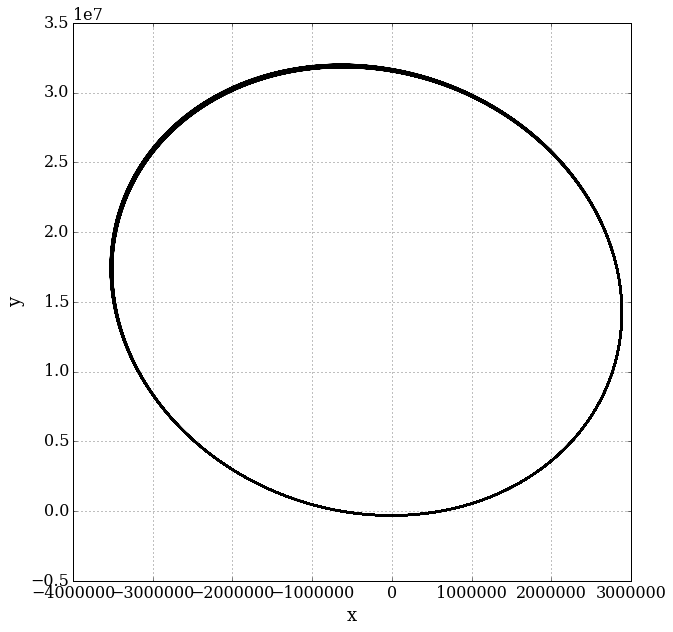

In [34]:
x = a_rk4[:,0]
y = a_rk4[:,1]
pyplot.figure(figsize=(10,10))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.plot(y,x, 'k-', lw=2);

On voit que l'astéroïde fait une trajectoire élliptique autour de la terre. Et un satellite de plus pour la terre !

5) Animation de nos tajectoires

In [68]:
from matplotlib import animation     #On importe de quoi pouvoir animer notre trajectoire
from IPython.display import HTML

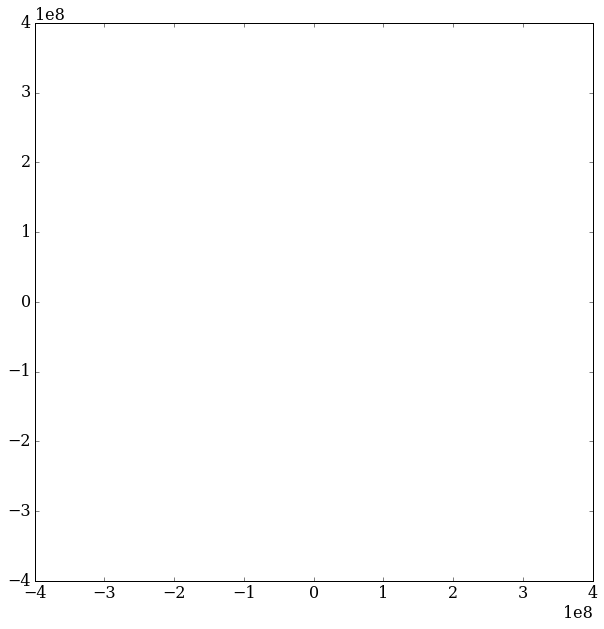

In [76]:
fig = pyplot.figure(figsize=(10,10))   #On crée le graphique qui va "héberger" notre animation
ax = pyplot.axes(xlim=(-4*10**8,4*10**8), ylim=(-4*10**8,4*10**8))
line = ax.plot([], [], color='#003366', ls='--', lw=3,) [0]

In [85]:
T = 2350681                                   #On crée la fonction qui va nous permettre d'animer la trajectoire lunaire
dt = 1
N = int(T/dt)+1
def animate(i):
    line.set_data(u_rk4[:i,0],u_rk4[:i,1])
    for j in range(N-1):                      #On recrée la boucle qui calcule la postion de la Lune pour plus d'exactitude
        u_rk4[n+1]   = RK4_step(u_rk4[n], f, dt)
        u_rk4[:i+1,0] = u_rk4[n+1][0]
        u_rk4[:i+1,1] = u_rk4[n+1][1]
    return line

In [86]:
anim = animation.FuncAnimation(fig, animate, frames = 100000, interval = 100) 

In [87]:
HTML(anim.to_html5_video()) #On mets le tout en vidéo

KeyboardInterrupt: 

In [ ]:
T = 1209600                                           #on applique le même raisonnement que pour la trajectoire lunaire
dt = 1
N = int(T/dt)+1
def animate2(i):
    line.set_data(a_rk4[:i,0],a_rk4[:i,1])
    for n in range(N-1):
        u_rk4[n+1]   = RK4_step(u_rk4[n], f, dt)
    
        xL=u_rk4[n+1][0]             
        yL=u_rk4[n+1][1]
    
        a_rk4[n+1] = RK4_step(a_rk4[n],f_ast,dt)
        a_rk4[:i+1,0] = a_rk4[n+1][0]
        a_rk4[:i+1,1] = a_rk4[n+1][1]
    return line

In [ ]:
anim = animation.FuncAnimation(fig, animate2, frames = 100000, interval = 100)

In [ ]:
HTML(anim.to_html5_video())

Nous avons des problèmes avec les animations de nos trajectoires. Nos avons essayé plusieurs codes et tous ont "l'air bons" mais la vidéo met bcp bcp de temps à apparaitre (on intetrrompt notre code au-delà des 5min). Le code ci-dessus est inspiré des codes d'autres étudiants chez qui l'animation apparait. Nous ne savons pas trop pourquoi nos animations n'apparaissent pas. La seule explication est que la vidéo boucle infiniment mais on ne comprend pas pourquoi elle agirait de telle sorte.

6) Discution des résultats


On introduit la solution exacte

In [ ]:
epsilon = 0.0549006           #excentricité théorique
rmin = 362600000              #distance départ de la lune théorique
theta0 = 0                    #angle de départ de la lune par rapport à l'horizontal dans notre repère.
                              #! on prend theta = O sur l'horizontale à gauche
dtheta = 2*pi/T               #on calcul le pas qu'il faut pour faire une période
r_exact = numpy.empty(T)      #pour créer la liste de la taille T = période
for n in range (T-1) :        #on calcul chaque point grâce l'équation théorique.
    
    r_exact [n] = rmin*(1+epsilon)/1+epsilon*cos(dtheta*n)

l'excentricité théorique (0.0549006) est, au chiffre significatif près, la valeur que l'on a trouvé avec notre code.
En ce qui concerne les valeurs des demi-axes, wikipédia donne des valeurs très proches des notres. 
https://fr.wikipedia.org/wiki/Lune
En conclusion, notre travail nous semble cohérent avec les prédictions théoriques et a du sens physiquement parlant.
Le seul problème réside dans nos animations qui ne fonctionnent pas et cela reste un mystère.
